# Predective Maintenance for Domestic Refrigerators using Medangel Sensors
### Ali Hammadeh

Using timeseries data collected from Medangel sensors, this project attempts to provide a prediction on whether a fridge needs maintenance or not to save medicine from damage due to temperature changes.

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation
import numpy as np

## Studying the Data

The first step was to study the data. My initial goals were to find out which features I needed, what the identifying key for every sensor is and cleaning the data for feature extraction and modelling 

In [3]:
#df = pd.read_csv(r"C:\Users\AliHa\Desktop\medangel\data\raw\CSV Fridges data.csv")
#df.head(5)
#df.info()

-We have 515939 rows and 19 columns

-Time format is in dd.mm.yyyy hh:mm:ss

-temperature format needs to be changed

-from initial looks, I can see that the important columns are "device_id", "temperature", "datetime" and "address"

In [4]:
df_relevant = preprocessing.load_relevant_data()
df_relevant.head()
df_relevant.info()

doy_id  temperature            datetime  device_id
0  31948:2019:13         20.3 2019-01-13 04:59:02      31948
1  31948:2019:13         20.3 2019-01-13 05:02:01      31948
2  31948:2019:13         20.3 2019-01-13 05:05:00      31948
3  31948:2019:13         20.3 2019-01-13 05:07:59      31948
4  31948:2019:13         20.3 2019-01-13 05:10:58      31948

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497434 entries, 0 to 515938
Data columns (total 4 columns):
doy_id         497434 non-null object
temperature    497434 non-null float64
datetime       497434 non-null datetime64[ns]
device_id      497434 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 17.1+ MB


## Feature Extraction - Minimal Features
I Had to make sure the data was in a format that is easily readable by tsfresh and then tsfresh did the rest. I started off by extracting the minimum features first and formed models on that data then I moved onto the comprehensive features

In [5]:
minimum_features = feature_creation.extract_minimum_features(df_relevant)

##### CODE FOR FUNCTION ABOVE
# def extract_minimum_features(df_relevant):
#     settings =  tsfresh.feature_extraction.MinimalFCParameters()
#     extracted_features = tsfresh.feature_extraction.extract_features(df_relevant, 
#                                               column_id = "doy_id",
#                                               column_sort = "datetime",
#                                               default_fc_parameters=settings,
#                                               column_value = "temperature")

#     extracted_features = extracted_features.drop(columns = "temperature__length")
#     assert(len(extracted_features == 1104))
#     return extracted_features

minimum_features.head()

Feature Extraction: 100%|██████████| 30/30 [00:03<00:00,  7.76it/s]


temperature__sum_values  temperature__median  \
31948:2019:100                   3308.3                 6.75   
31948:2019:101                   3093.7                 6.40   
31948:2019:102                   3038.4                 6.30   
31948:2019:103                   3092.8                 6.40   
31948:2019:104                   3092.8                 6.40   

                temperature__mean  temperature__standard_deviation  \
31948:2019:100           6.863693                         0.356314   
31948:2019:101           6.431809                         0.271912   
31948:2019:102           6.290683                         0.230078   
31948:2019:103           6.416598                         0.192425   
31948:2019:104           6.403313                         0.165907   

                temperature__variance  temperature__root_mean_square  \
31948:2019:100               0.126960                       6.872935   
31948:2019:101               0.073936                       6.437554   
31948:2019:102               0.052936                       6.294889   
31948:2019:103               0.037027                       6.419482   
31948:2019:104               0.027525                       6.405462   

                temperature__maximum  temperature__minimum  
31948:2019:100                   7.6                   6.3  
31948:2019:101                   7.1                   5.9  
31948:2019:102                   7.0                   6.0  
31948:2019:103                   7.0                   6.1  
31948:2019:104                   6.8                   6.1

## Modelling using Minimum Features

I used Kmeans clustering for my initial modelling to see if there are any obvious clusters that can be found.

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  f"KMeans is known to have a memory leak on Windows "


KMeans(init='random', n_clusters=1, random_state=42)

KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=3, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=5, random_state=42)

KMeans(init='random', n_clusters=6, random_state=42)

KMeans(init='random', n_clusters=7, random_state=42)

KMeans(init='random', random_state=42)

KMeans(init='random', n_clusters=9, random_state=42)

KMeans(init='random', n_clusters=10, random_state=42)

([<matplotlib.axis.XTick at 0x241d8826e48>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

<function matplotlib.pyplot.show(*args, **kw)>

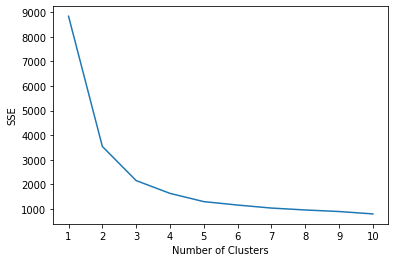

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
InteractiveShell.ast_node_interactivity = "last_expr"

scaler = StandardScaler()
scaled_features = scaler.fit_transform(minimum_features)

from matplotlib import pyplot as plt
kmeans_kwargs = {
    "init":"random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    # sum of the squared distance between centroid and each member of the cluster
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show



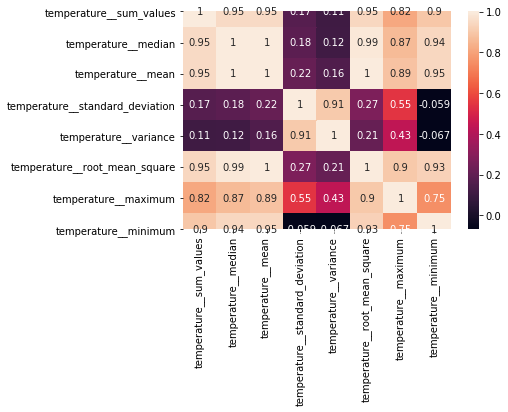

In [7]:
from medangel.visualization import viz_creation
viz_creation.create_heatmap(minimum_features)

Feature Extraction: 100%|██████████| 30/30 [00:03<00:00,  7.99it/s]
C:\Python\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


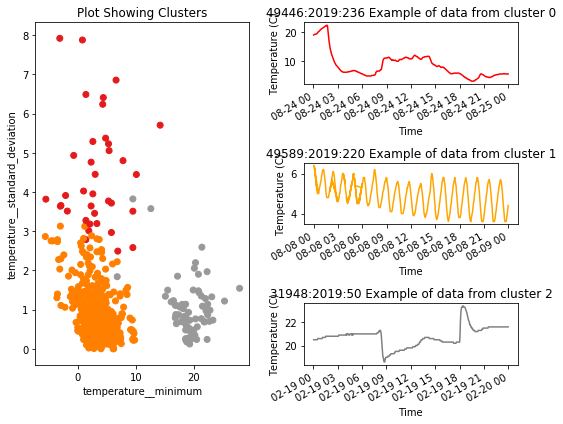

In [8]:
viz_creation.create_multiple_figure(df_relevant)

The 3 clusters above look pretty good but the problem is the minimum temperature. A good fridge has a temperature curve like the example above and doesn't go below 0 C but within the cluster you can see many points go below 0. 

## Feature Extraction - Comprehensive Features

After looking at the minimum features I decided to do the same thing with the comprehensive features to see if we can solve the problem above.

In [9]:
InteractiveShell.ast_node_interactivity = "last_expr"
comprehensive_features = feature_creation.extract_comprehensive_features(df_relevant)
kmeans_comprehensive,scaled_comprehensive = model_builder.kmeans_clustering(comprehensive_features)


Feature Extraction: 100%|██████████| 30/30 [01:29<00:00,  2.99s/it]


In [10]:
comprehensive_features.shape
scaled_comprehensive_df = pd.DataFrame(scaled_comprehensive, columns = comprehensive_features.columns)
covMatrix_comp = pd.DataFrame.cov(scaled_comprehensive_df)
abs(covMatrix_comp).stack().idxmin()

('temperature__variance_larger_than_standard_deviation',
 'temperature__has_duplicate')

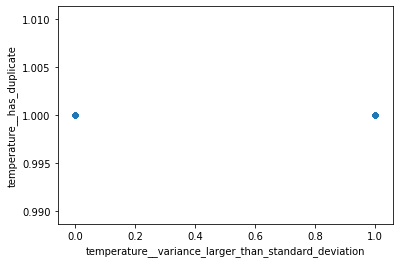

In [11]:
comprehensive_features.plot.scatter(x='temperature__variance_larger_than_standard_deviation',y='temperature__has_duplicate')

In [12]:
comprehensive_features.head()

temperature__variance_larger_than_standard_deviation  \
31948:2019:100                                                0.0      
31948:2019:101                                                0.0      
31948:2019:102                                                0.0      
31948:2019:103                                                0.0      
31948:2019:104                                                0.0      

                temperature__has_duplicate_max  \
31948:2019:100                             1.0   
31948:2019:101                             0.0   
31948:2019:102                             1.0   
31948:2019:103                             1.0   
31948:2019:104                             1.0   

                temperature__has_duplicate_min  temperature__has_duplicate  \
31948:2019:100                             1.0                         1.0   
31948:2019:101                             1.0                         1.0   
31948:2019:102                             1.0                         1.0   
31948:2019:103                             1.0                         1.0   
31948:2019:104                             1.0                         1.0   

                temperature__sum_values  temperature__abs_energy  \
31948:2019:100                   3308.3                 22768.35   
31948:2019:101                   3093.7                 19933.65   
31948:2019:102                   3038.4                 19139.18   
31948:2019:103                   3092.8                 19863.10   
31948:2019:104                   3092.8                 19817.46   

                temperature__mean_abs_change  temperature__mean_change  \
31948:2019:100                      0.047609                  0.000208   
31948:2019:101                      0.067708                 -0.000625   
31948:2019:102                      0.067427                 -0.000207   
31948:2019:103                      0.055925                  0.001040   
31948:2019:104                      0.061618                 -0.001452   

                temperature__mean_second_derivative_central  \
31948:2019:100                                    -0.000104   
31948:2019:101                                    -0.000104   
31948:2019:102                                     0.000000   
31948:2019:103                                     0.000000   
31948:2019:104                                     0.000000   

                temperature__median  ...  \
31948:2019:100                 6.75  ...   
31948:2019:101                 6.40  ...   
31948:2019:102                 6.30  ...   
31948:2019:103                 6.40  ...   
31948:2019:104                 6.40  ...   

                temperature__ratio_beyond_r_sigma__r_10  \
31948:2019:100                                      0.0   
31948:2019:101                                      0.0   
31948:2019:102                                      0.0   
31948:2019:103                                      0.0   
31948:2019:104                                      0.0   

                temperature__count_above__t_0  temperature__count_below__t_0  \
31948:2019:100                            1.0                            0.0   
31948:2019:101                            1.0                            0.0   
31948:2019:102                            1.0                            0.0   
31948:2019:103                            1.0                            0.0   
31948:2019:104                            1.0                            0.0   

                temperature__lempel_ziv_complexity__bins_2  \
31948:2019:100                                    0.072614   
31948:2019:101                                    0.066528   
31948:2019:102                                    0.132505   
31948:2019:103                                    0.114108   
31948:2019:104                                    0.091097   

                temperature__lempel_ziv_complexity__bins_3  \
31948:2019:100                              

## Principal Component Analysis 

Because the technique above didn't work Andreas advised me to try PCA. 

PCA: reduce the number of variables of a data set, while preserving as much information as possible. (https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

In [13]:
from sklearn.decomposition import PCA
pca_85 = PCA(.85)
principal_components_85 = pca_85.fit_transform(scaled_comprehensive_df)
#principalDf = pd.DataFrame(data = principal_components,
#                          columns = pd.Series(range(1,11)).astype("str"))

#pca_covariance_95 = pd.DataFrame(pca_95.get_covariance(),
#                              columns = comprehensive_filtered.columns,
#                              index = comprehensive_filtered.columns)
sum(pca_85.explained_variance_ratio_)
pca_85.n_components_
pca_85.explained_variance_ratio_

array([0.20309385, 0.12300238, 0.08524907, 0.0695778 , 0.05424874,
       0.04114374, 0.03559803, 0.03045994, 0.0246963 , 0.0216933 ,
       0.01922984, 0.01725041, 0.01635772, 0.01392848, 0.01329254,
       0.01134813, 0.01077193, 0.00940789, 0.00872978, 0.00841824,
       0.00772002, 0.00722929, 0.00700764, 0.0066455 , 0.0063781 ])

In [14]:
principalDf_85 = pd.DataFrame(data = principal_components_85,
                          columns = pd.Series(range(1,pca_85.n_components_ + 1)).astype("str"))

In [15]:
principalDf_85.head()

1         2         3         4         5         6         7  \
0 -1.987746  0.659206 -0.149672  1.297247  0.848733  2.570850 -0.306396   
1 -0.938621 -1.180380 -1.106911 -0.822434 -4.461601  2.264432 -1.598060   
2 -1.400816 -1.491319 -0.794663 -1.847150 -2.972264  4.372816  0.489050   
3 -1.843725 -0.914593 -0.116909 -0.226982 -2.655877  3.777312  0.093649   
4 -1.255684 -1.282782 -0.221762 -0.305639 -4.063823  3.029991 -1.588586   

          8         9        10  ...        16        17        18        19  \
0  0.128299  0.625668  0.355378  ...  0.862665 -0.303727  0.452262 -2.058743   
1 -1.625335 -0.214982 -1.086030  ... -0.599070 -1.372602 -0.799507 -1.598971   
2 -1.205972 -0.692726 -1.669980  ...  0.090280 -1.017121  0.380950 -1.440349   
3  0.064515 -0.661494 -0.909907  ... -1.201411 -0.402173  0.287796 -0.787300   
4  0.551542 -0.888611 -0.987447  ... -2.434065 -0.885006 -0.260788 -0.393887   

         20        21        22        23        24        25  
0  0.470296 -1.112017  0.991502  1.198568 -0.042783  0.528685  
1  2.088617  0.627321  0.695953 -0.581025  1.954595  0.784712  
2  0.834634  0.443297  0.952279  0.184915  0.214082  1.226135  
3  0.829213  0.665131  1.118659  1.376353  0.070236  2.078145  
4  1.538530  2.029153 -0.602366  0.249325  0.478880  1.200337  

[5 rows x 25 columns]

Text(0, 0.5, 'Principal component 2')

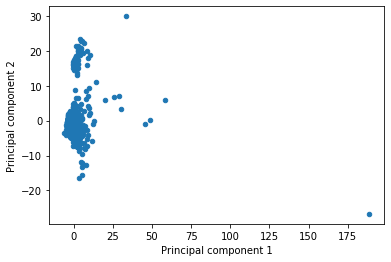

In [25]:
principalDf_85.plot.scatter(x="1",y="2")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")

Text(0, 0.5, 'Principal component 3')

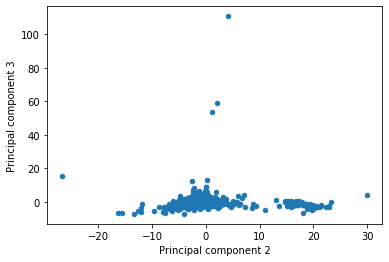

In [26]:
principalDf_85.plot.scatter(x="2",y="3")
plt.xlabel("Principal component 2")
plt.ylabel("Principal component 3")